In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Vasu Jindal.txt','r',encoding='utf-8')
# f = open('WhatsApp Chat with Cloud DevOps Aspirants .txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

8/27/24, 12:26 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/27/24, 12:26 PM - Vasu Jindal is a contact
8/27/24, 12:17 PM - Vasu Jindal: <Media omitted>
8/27/24, 12:17 PM - Vasu Jindal: <Media omitted>
8/27/24, 12:17 PM - Vasu Jindal: <Media omitted>
8/27/24, 12:29 PM - Vasu Jindal: https://chat.whatsapp.com/IovOYY7pyn92MACOyUyroQ
8/27/24, 12:29 PM - Vasu Jindal: https://chat.whatsapp.com/J69pWzCKbvS8EqAxoFxPiF
8/27/24, 12:29 PM - Vasu Jindal: Follow this link to join my WhatsApp group: https://chat.whatsapp.com/I0z3F0a9gDv85wJiJHt1BM
8/27/24, 12:29 PM - Vasu Jindal: https://classroom.google.com/c/NzA4NTQ5MDUyNzI3?cjc=nxs5mhk
8/27/24, 12:29 PM - Vasu Jindal: Both CSE and CSA
8/27/24, 12:42 PM - .: Roll no list
8/27/24, 12:47 PM - .: Can you send me all the documents of the groups
8/27/24, 12:47 PM - .: And add me in unofficial group
8/27/24, 12:50 PM - Vasu Jindal: Will share everything

In [5]:
data_cleaned = data.replace('\u202f', ' ')

In [6]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s?(?:AM|PM)\s-\s'

In [7]:
messages = re.split(pattern,data_cleaned)[1:]
len(messages)

8338

In [8]:
dates = re.findall(pattern,data_cleaned)

In [9]:
df = pd.DataFrame({'user_messages':messages,'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'], format="%m/%d/%y, %I:%M %p - ")
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,2024-08-27 12:26:00
1,Vasu Jindal is a contact\n,2024-08-27 12:26:00
2,Vasu Jindal: <Media omitted>\n,2024-08-27 12:17:00
3,Vasu Jindal: <Media omitted>\n,2024-08-27 12:17:00
4,Vasu Jindal: <Media omitted>\n,2024-08-27 12:17:00


In [10]:
df.shape

(8338, 2)

In [11]:
# separate users and messages
users = []
messages = []
for message in df['user_messages']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_messages'],inplace=True)

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\msi 1\AppData\Local\Temp\ipykernel_20052\790143612.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s',message)


,date,user,message
0,2024-08-27 12:26:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-08-27 12:26:00,group_notification,Vasu Jindal is a contact\n
2,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n
3,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n
4,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n


In [12]:
df['year']=df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2024-08-27 12:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-08-27 12:26:00,group_notification,Vasu Jindal is a contact\n,2024
2,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024
3,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024
4,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-08-27 12:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,27,12,26
1,2024-08-27 12:26:00,group_notification,Vasu Jindal is a contact\n,2024,August,27,12,26
2,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17
3,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17
4,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17


In [19]:
df[df['user']=='Vasu Jindal'].shape

(4277, 8)

In [20]:
words = []

In [21]:
len(words)

0

In [22]:
df[df['message'] == '<Media omitted>\n'].shape

(244, 8)

In [23]:
pip install URLExtract

Note: you may need to restart the kernel to use updated packages.


In [24]:
from urlextract import URLExtract

In [25]:
extractor = URLExtract()
urls = extractor.find_urls("Let's www.google.com have URL stackoverflow.com as an example.com, http://www.facebook.com")
urls

['www.google.com',
 'stackoverflow.com',
 'example.com',
 'http://www.facebook.com']

In [26]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))
    

In [27]:
links

['https://chat.whatsapp.com/IovOYY7pyn92MACOyUyroQ',
 'https://chat.whatsapp.com/J69pWzCKbvS8EqAxoFxPiF',
 'https://classroom.google.com/c/NzA4NTQ5MDUyNzI3?cjc=nxs5mhk',
 'http://localhost:8888/lab/tree/Data%20Mining%20and%20Warehouse/DMW_exp1.ipynb',
 'https://leetcode.com/problems/largest-number/?envType=daily-question&envId=2024-09-18',
 'https://www.gatevidyalay.com/tag/principal-component-analysis-numerical-example/',
 'https://www.instagram.com/reel/DBG0yp_tX70/?igsh=cW90bmJ5b24wMWVj',
 'https://www.instagram.com/reel/DBkXM15sk6w/?igsh=cnA0ZXplaG4yMWpl',
 'https://images.app.goo.gl/SYQHZTr7afr4Wekk9',
 'https://youtube.com/shorts/7N9JHZI41N0?si=i5fEq6c58OmjoDWp',
 'jeevansathi.com',
 'https://wa.me/stickerpack/ZOOKiZ_HI',
 'https://wa.me/stickerpack/AxoAndJax',
 'https://wa.me/stickerpack/RealisticRabbit',
 'https://wa.me/stickerpack/ABurdensomePigeonNamedEagle',
 '15.206.73.33',
 'https://aws.amazon.com/blogs/compute/how-to-mount-linux-volume-and-keep-mount-point-consistency/',


In [28]:
len(links)

29

In [29]:
x = df['user'].value_counts().head()

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count = x.values

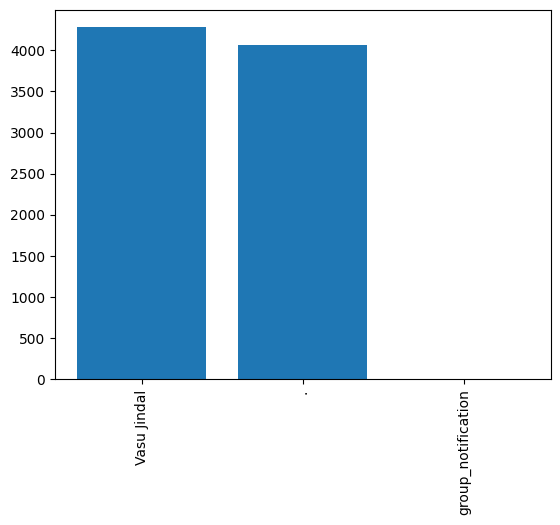

In [32]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,Vasu Jindal,51.30
1,.,48.67
2,group_notification,0.04


In [34]:
temp = df[df['user']!= 'group_notification']
temp = temp[temp['message']!='<Media omitted>']

In [35]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [36]:
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    # words.extend(message.split())

In [38]:
words

['<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 'https://chat.whatsapp.com/iovoyy7pyn92macoyuyroq',
 'https://chat.whatsapp.com/j69pwzckbvs8eqaxofxpif',
 'https://classroom.google.com/c/nza4ntq5mduynzi3?cjc=nxs5mhk',
 'cse',
 'csa',
 'roll',
 'list',
 'send',
 'documents',
 'groups',
 'unofficial',
 'group',
 'share',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 '<media',
 'omitted>',
 'lot',
 'welcome',
 '🤗',
 'left??',
 'document??',
 'question',
 'yesterday',
 'class',
 'thi?',
 'left',
 'shared',
 'rest',
 'find',
 'share',
 'yesterday',
 'holiday',
 'card',
 'form',
 'aapko',
 'gya',
 '😂😂',
 'printed',
 'bheja',
 'topics',
 'baat',
 'sign',
 'puc

In [39]:
from collections import Counter

In [40]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<media,244
1,omitted>,244
2,😂😂,171
3,??,167
4,baat,157
5,pta,131
6,message,120
7,mene,113
8,gya,90
9,mtlb,80


In [41]:
# remove group messages
# remove media ommited
# remove stopwords

In [42]:
!pip install emoji

In [43]:
import emoji

In [44]:
emojis = []

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [45]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,425
1,🫠,136
2,🤣,126
3,🥹,55
4,🙂,47
...,...,...
69,♀,1
70,🫢,1
71,🙊,1
72,🤏,1


In [46]:
df['month_num'] = df['date'].dt.month

In [47]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2024,8,August,577
1,2024,9,September,939
2,2024,10,October,1839
3,2024,11,November,836
4,2024,12,December,1574
5,2025,1,January,2573


In [48]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [49]:
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2024,8,August,577,August-2024
1,2024,9,September,939,September-2024
2,2024,10,October,1839,October-2024
3,2024,11,November,836,November-2024
4,2024,12,December,1574,December-2024
5,2025,1,January,2573,January-2025


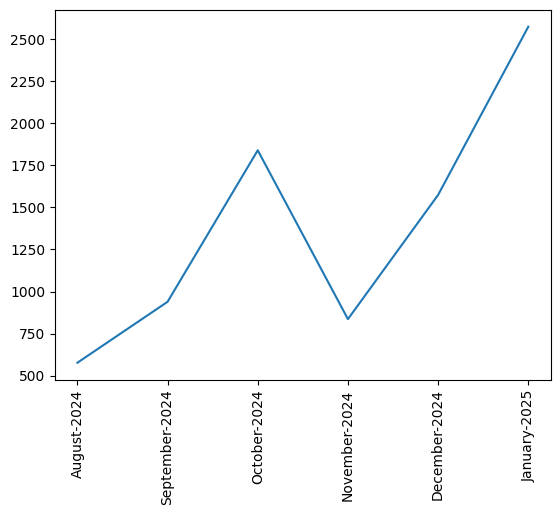

In [50]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation=90)
plt.show()

In [51]:
df['only_date']=df['date'].dt.date

In [52]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

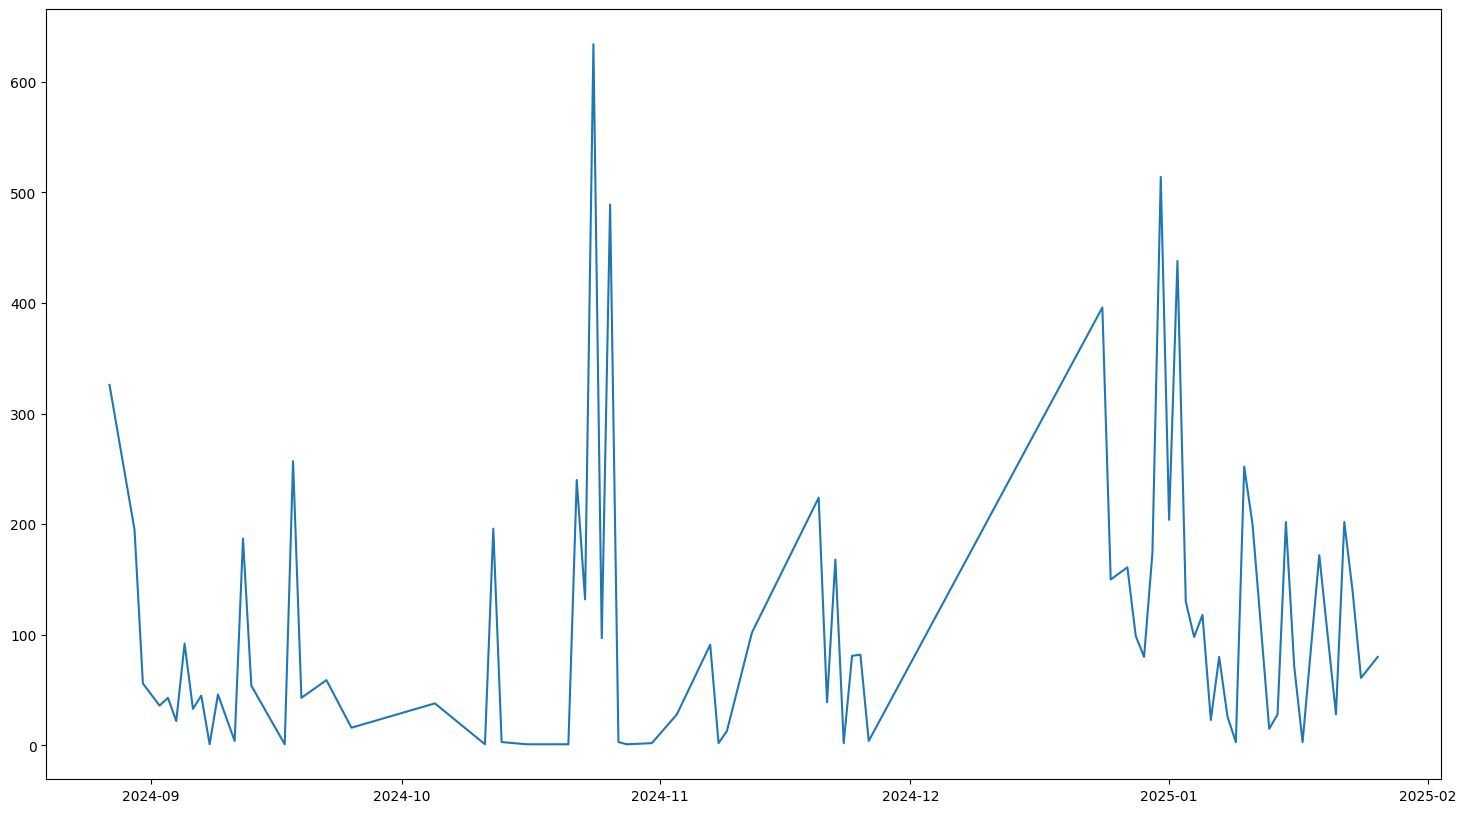

In [53]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [54]:
df['day_name']=df['date'].dt.day_name()

In [55]:
df['day_name'].value_counts()

day_name
Tuesday      1762
Thursday     1740
Wednesday    1440
Saturday     1236
Friday       1157
Sunday        625
Monday        378
Name: count, dtype: int64

In [56]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2024-08-27 12:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,27,12,26,8,2024-08-27,Tuesday
1,2024-08-27 12:26:00,group_notification,Vasu Jindal is a contact\n,2024,August,27,12,26,8,2024-08-27,Tuesday
2,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday
3,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday
4,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday


In [57]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+'-'+str('00'))
    elif hour == 0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+'-'+str(hour+1))

In [58]:
df['period'] = period

In [59]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2024-08-27 12:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,27,12,26,8,2024-08-27,Tuesday,12-13
1,2024-08-27 12:26:00,group_notification,Vasu Jindal is a contact\n,2024,August,27,12,26,8,2024-08-27,Tuesday,12-13
2,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday,12-13
3,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday,12-13
4,2024-08-27 12:17:00,Vasu Jindal,<Media omitted>\n,2024,August,27,12,17,8,2024-08-27,Tuesday,12-13


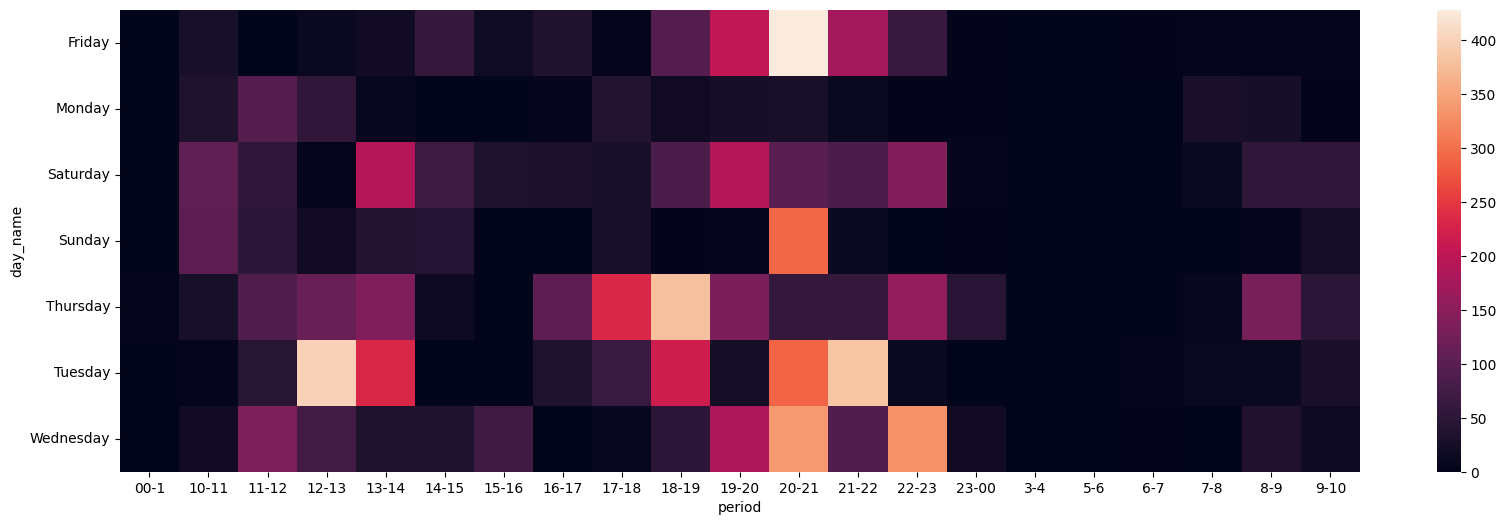

In [61]:

import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()